# Compare Models to Select the Best Hyperparameters
This tutorial will review **[AMPL](https://github.com/ATOMScience-org/AMPL)** functions for visualizing the results of a hyperparameter search in order to find the optimal hyperparameters for your model.

After performing a hyperparameter search, it is prudent to examine each hyperparameter in order to determine the best combination before training a production model with all of the data. Additionally, it is good to explore multiple performance metrics and visualize the predictions instead of relying solely on metrics.

For the purposes of this tutorial, we simply ran **Tutorial 5, "Hyperparameter Optimization"**, with different parameters such as those outlined **[here](https://github.com/ATOMScience-org/AMPL#hyperparameter-optimization)** to get enough models for comparison. Specifically, we created additional **NN** and  **[XGBoost](https://en.wikipedia.org/wiki/XGBoost)** models as well as using **fingerprint** and **scaffold splits**. If you don't want to run that many models, you can use the `result_df` saved here: `dataset/SLC6A3_models/07_example_pred_df.csv`.

In this tutorial, we will focus on these functions:

* [plot_train_valid_test_scores](https://ampl.readthedocs.io/en/latest/pipeline.html#pipeline.hyper_perf_plots.plot_train_valid_test_scores)
* [plot_split_perf](https://ampl.readthedocs.io/en/latest/pipeline.html#pipeline.hyper_perf_plots.plot_split_perf)
* [plot_hyper_perf](https://ampl.readthedocs.io/en/latest/pipeline.html#pipeline.hyper_perf_plots.plot_hyper_perf)
* [get_score_types](https://ampl.readthedocs.io/en/latest/pipeline.html#pipeline.hyper_perf_plots.get_score_types)
* [plot_xg_perf](https://ampl.readthedocs.io/en/latest/pipeline.html#pipeline.hyper_perf_plots.plot_xg_perf)
* [plot_pred_vs_actual_from_file](https://ampl.readthedocs.io/en/latest/pipeline.html#pipeline.perf_plots.plot_pred_vs_actual_from_file)


## Import Packages

In [83]:
from atomsci.ddm.pipeline import compare_models as cm
from atomsci.ddm.pipeline import hyper_perf_plots as hpp
from atomsci.ddm.pipeline import perf_plots as pp
import pandas as pd
pd.set_option('display.max_columns', None)

# ignore warnings in tutorials
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

## Get Model Results and Filter
First we pull the results of the hyperparameter search into a dataframe. In **Tutorial 5, "Hyperparameter Optimization"**, we used `get_filesystem_perf_results()` which packs hyperparameters in a dict in the column `model_parameters_dict`. Here we use the individual hyperparameter columns to create visualizations.  

The `result_df` used here as an example is the result of calling `get_filesystem_perf_results()` once after training several hundred models with different parameters. These models were all saved in a single folder, but the function works iteratively so it can search an entire directory tree if a parent folder is passed.

In [84]:
import atomsci.ddm.pipeline.compare_models as cm

model_dir = f'./ST_models2/ROS_models'

result_df = cm.get_filesystem_perf_results(
    result_dir = model_dir,
    pred_type='classification'
)

# sort by validation r2 score to see top performing models
result_df = result_df.sort_values(by='best_valid_roc_auc_score', ascending=False)
result_df[['model_uuid','model_parameters_dict','best_valid_roc_auc_score','best_test_roc_auc_score']].head()


Found data for 400 models under ./ST_models2/ROS_models


,model_uuid,model_parameters_dict,best_valid_roc_auc_score,best_test_roc_auc_score
80,74a05274-e413-4e9d-8246-f14bd4141dd3,"{""best_epoch"": 48, ""dropouts"": [0.3693101775808332, 0.11774769969851873, 0.06389079199984268], ""layer_sizes"": [270, 357, 351], ""learning_rate"": 0.003830757694844993, ""max_epochs"": 100}",0.762583,0.558497
207,a08feb85-02e4-4a70-80ea-54a4b444382c,"{""best_epoch"": 53, ""dropouts"": [0.02144607176149764, 0.10531927864500294, 0.09472596185308929], ""layer_sizes"": [236, 56, 128], ""learning_rate"": 0.007476060879271056, ""max_epochs"": 100}",0.759892,0.508497
296,0b40d4c3-7d4e-4514-832f-bfb19cdba4c4,"{""best_epoch"": 58, ""dropouts"": [0.08853905389270103, 0.031265592924328116, 0.07294730528342783], ""layer_sizes"": [165, 221, 181], ""learning_rate"": 0.007278410983436372, ""max_epochs"": 100}",0.759101,0.562092
237,d86b502e-7761-4a7f-85ed-53b5f5751cc0,"{""best_epoch"": 39, ""dropouts"": [0.17589033295405837, 0.029283909373853206, 0.15541928297824228], ""layer_sizes"": [170, 213, 141], ""learning_rate"": 0.005827589942121128, ""max_epochs"": 100}",0.753720,0.559641
233,3cb71d5c-97a3-443b-a1f0-4183ec4cc159,"{""best_epoch"": 59, ""dropouts"": [0.15206903809864572, 0.12853391755159907, 0.11688550582487273], ""layer_sizes"": [190, 82, 185], ""learning_rate"": 0.016138217609309717, ""max_epochs"": 100}",0.753403,0.609477


In [82]:
# model_path='/Users/echun/repos/DILI/AMPL_models/ST_models/ROS_models/ROS_hits_up_class_curR_model_b2a33aa3-59b5-4b75-8981-cf17afdb03da.tar.gz' uuid = "b2a33aa3-59b5-4b75-8981-cf17afdb03da"  # your UUID
model_uuid = "5f392250-431c-47a3-b2b4-509134b6bd7e"
model_info = result_df[result_df["model_uuid"]==model_uuid]
pd.set_option('display.max_colwidth', 500)
print(model_info[['model_uuid',
                  'model_parameters_dict',
                  'best_train_roc_auc_score',
                  'best_valid_roc_auc_score',
                  'best_test_roc_auc_score']])


                               model_uuid  \
743  5f392250-431c-47a3-b2b4-509134b6bd7e   

                                                 model_parameters_dict  \
743  {"rf_estimators": 41, "rf_max_depth": 21, "rf_max_features": 149}   

     best_train_roc_auc_score  best_valid_roc_auc_score  \
743                  0.999096                  0.652434   

     best_test_roc_auc_score  
743                  0.57836  


We can look at a brief count of models for important parameters by creating a pivot table. Here we can see **[ECFP fingerprints](https://pubs.acs.org/doi/10.1021/ci100050t)** and **[RDKit](https://github.com/rdkit/rdkit)** features and **fingerprint** and **scaffold splitters** were used for each model type. A fingerprint splitter provides a more stringent test of model performance by making sure the validation and test compounds are structurally dissimilar to the training set compounds.

In [ ]:
# model counts
model_counts=pd.DataFrame(result_df.groupby(['features','splitter','model_type'])['model_uuid'].count()).reset_index()
model_counts=model_counts.pivot(index='model_type',columns=['splitter','features',], values='model_uuid')
model_counts

Often, certain random combinations of hyperparameters result in terribly performing models. Here we will filter those out so they don't affect the visualization by only keeping models with a validation `r2_score` of 0.1 or greater.

In [ ]:
result_df.best_valid_roc_auc_score.describe()

In [57]:
# filter out objectively bad performing models
result_df=result_df[result_df.best_valid_roc_auc_score>0.2]
result_df.shape

(400, 70)

In [58]:
# result_df.best_valid_prc_auc_score.describe()
# result_df.best_valid_accuracy_score.describe()

result_df=result_df[result_df.best_valid_accuracy_score>0.1]
result_df.shape

(400, 70)

After filtering out models with extremely poor metrics, we can see that some combinations don't work at all, and are completely filtered from the set. For example, decision tree based models using **[RDKit](https://github.com/rdkit/rdkit)** or **[ECFP](https://pubs.acs.org/doi/10.1021/ci100050t)** features work very poorly to predict on fingerprint-split models.

In [88]:
#  model counts
model_counts=pd.DataFrame(result_df.groupby(['features','splitter','model_type'])['model_uuid'].count()).reset_index()
model_counts=model_counts.pivot(index='model_type',columns=['splitter','features',], values='model_uuid')
model_counts

splitter   scaffold          
features        moe rdkit_raw
model_type                   
NN              100       100
RF              100       100

## Visualize Hyperparameters
There are several plotting functions in the `hyper_perf_plots` module that help visualize the different combinations of features for each type of model.

#### Examine overall scores
`plot_train_valid_test_scores()` gives a quick snapshot of your overall model performance. You can see if you overfitted and get a sense of whether your partitions are a good representation of future performance. Because the splitter can have a drastic effect on model performance, these plots are also separated by split type.

Here we see a fairly typical pattern where the training set metrics are higher than validation and test partitions. It is good to see that the validation and test scores are similar across many models, indicating that the models should generalize to new data well. For fingerprint splits, we see an odd trend where the model performs _better_ on the test set than the validation set (remember - we want to minimize MAE or RMSE!), suggesting that the split is problematic since the validation set does not necessarily  reflect the generalization capability of the model accurately.

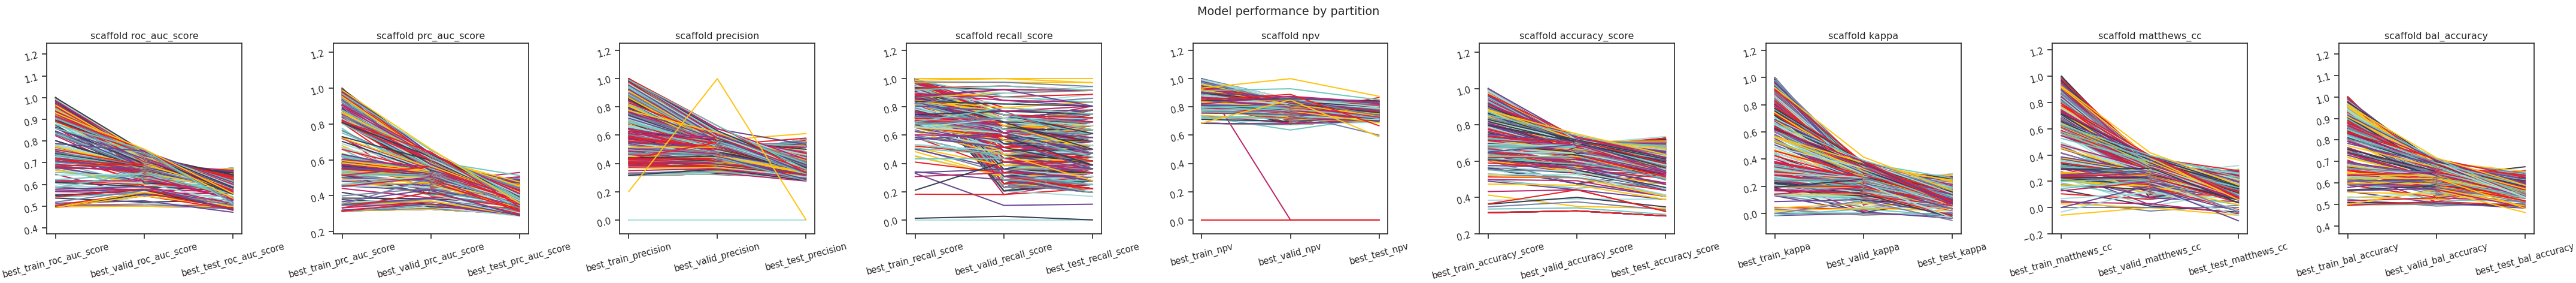

In [8]:
hpp.plot_train_valid_test_scores(result_df, prediction_type='classification')

#### Examine Splits

`plot_split_perf()` plots the performance of each split type, separated by feature type, for each performance metric. 

We can see that **fingerprint splits** perform much worse than **scaffold splits** for this dataset, and but **[RDKit](https://github.com/rdkit/rdkit)** and **[ECFP](https://pubs.acs.org/doi/10.1021/ci100050t)** features perform differently. **[ECFP](https://pubs.acs.org/doi/10.1021/ci100050t)** features work better for scaffold splits while **[RDKit](https://github.com/rdkit/rdkit)** features work better for **fingerprint splits**. Recalling the filtering from above, we know that **[RDKit](https://github.com/rdkit/rdkit)** features for **fingerprint splits** are only represented by **NN** models, which may skew these results.

In [ ]:
hpp.plot_split_perf(result_df, subset='valid')

#### General Model Features
We also want to understand general hyperparameters like model type and feature type and their effect on performance. We can use `plot_hyper_perf()` with `model_type='general'` as a shortcut to visualize these. 

We can see that **random forests** or **neural networks** perform the best while **[ECFP](https://pubs.acs.org/doi/10.1021/ci100050t)** features perform better than **RDKit**. Additionally, the **random forest** models are very consistent while there is more variability in the **NN** and **XGBoost** model performance.

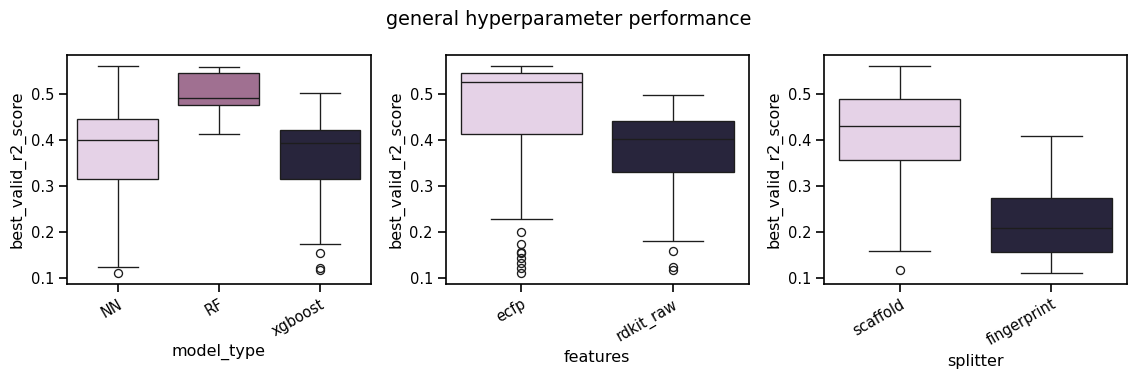

In [10]:
hpp.plot_hyper_perf(result_df, model_type='general')

#### RF-specific Hyperparameters
We can also use `plot_hyper_perf()` to visualize model-specific hyperparameters. In this case we examine random forest models because they generally perform the best for this dataset.

Here, we can see two distinct sets of `valid_r2_scores` (probably from **fingerprint** vs **scaffold split** models), but both sets show similar trends. For `rf_estimators` it looks like 100-150 trees is optimal, while `rf_max_depth` does worse below ~15 and improves slowly after that. `rf_max_features` doesn't show a clear trend except that below 50 might result in worse models.

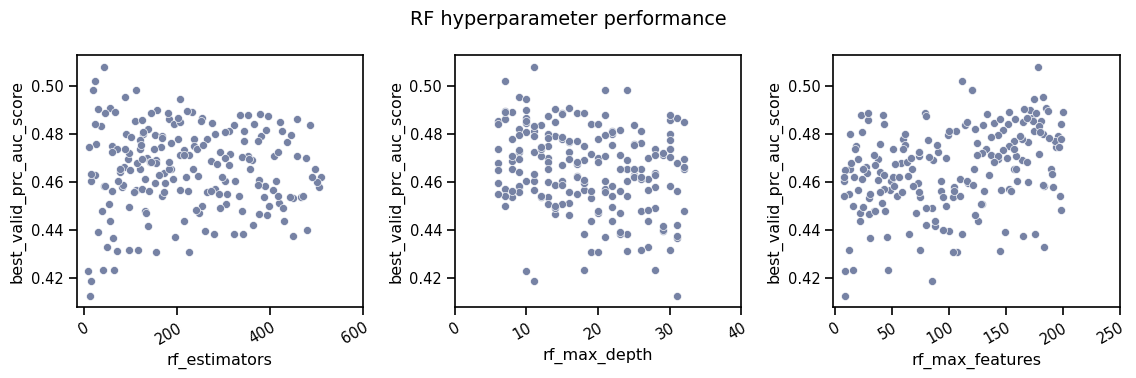

In [9]:
hpp.plot_hyper_perf(result_df, model_type='RF', subset='valid', scoretype='prc_auc_score')

We can quickly get a list of scores to plot with `get_score_types()` and create the same plots with different metrics.

In [14]:
hpp.get_score_types()

Classification metrics:  ['roc_auc_score', 'prc_auc_score', 'precision', 'recall_score', 'npv', 'accuracy_score', 'kappa', 'matthews_cc', 'bal_accuracy']
Regression metrics:  ['r2_score', 'mae_score', 'rms_score']


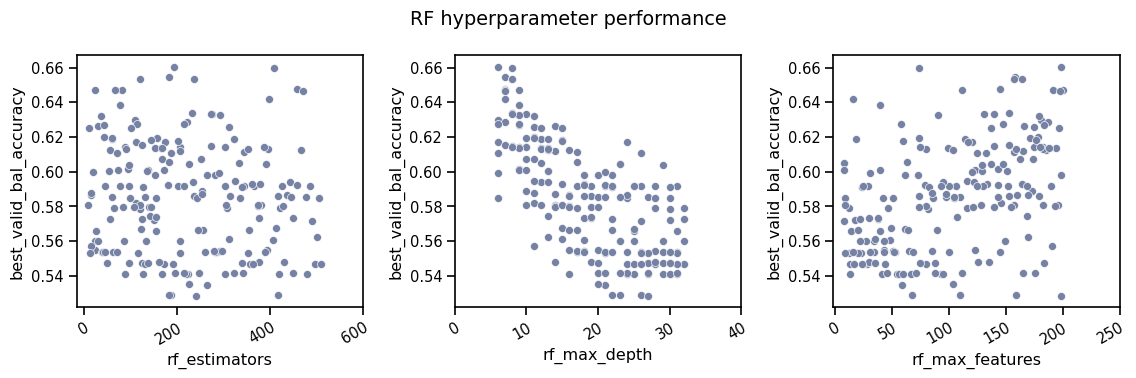

In [10]:
hpp.plot_hyper_perf(result_df, model_type='RF', subset='valid', scoretype='bal_accuracy')

### NN Visualization
When visualizing hyperparameters of NN models in this case, it is slightly hard to see important trends because there is a large variance in their model performance. To avoid this, we use `plot_hyper_perf()` with a subsetted dataframe to look at a single combination of splitter and features. 

|Plot features|Description|
|---|---|
|`avg_dropout`|The average of dropout proportions across all layers of the model. This parameter can affect the generalizability and overfitting of the model and usually dropout of 0.1 or higher is best.|
|`learning_rate`|The learning rate during training. Generally, learning rates that are ~10e-3 do best.|
|`num_weights`|The product of layer sizes plus number of nodes in first layer, a rough estimate of total model size/complexity. This parameter should be minimized by selecting the smallest layer sizes possible that still maximize the preferred metric|
|`num_layers`|The number of layers in the NN, another marker of complexity. This should also be minimized.|
|`best_epoch`|Which epoch had the highest performance metric during training. This can indicate problematic training if the best_epochs are very small.|
|`max_epochs`|The max number of epochs the model was allowed to train (although "early stopping" may have occurred). If the max_epochs is too small you may underfit your model. This could be shown by all of your best_epochs being at max_epoch.|

In [ ]:
subsetted=result_df[result_df.splitter=='scaffold']
subsetted=subsetted[subsetted.features=='rdkit_raw']
hpp.plot_hyper_perf(subsetted, model_type='NN')

### XGBoost Visualization
Using `plot_xg_perf()`, we can simultaneously visualize the two most important parameters for **[XGBoost](https://en.wikipedia.org/wiki/XGBoost)** models - the learning rate and gamma. We can see that `xgb_learning_rate` should be between 0 and 0.45, after which the performance starts to deteriorate. There's no clear trend for `xgb_gamma`. We can additionally use `plot_hyper_perf()` to visualize more **[XGBoost](https://en.wikipedia.org/wiki/XGBoost)** parameters, but this is not shown here.

In [14]:
# hpp.plot_hyper_perf(result_df, model_type='xgboost')

In [ ]:
hpp.plot_xg_perf(result_df)

## Evaluation of a Single Model

After calling `compare_models.get_filesystem_perf_results()`, the dataframe can be sorted according to the score you care about. The column `model_parameters_dict` contains hyperparameters used for the best model. We can visualize this model using `perf_plots.plot_pred_vs_actual_from_file()`.

> **Note:** *Not all scores should be maximized. For example, `mae_score` or `rms_score` should be minimized instead.*

In [92]:
# exclude_features = ['moe']
# filtered_df = result_df[~result_df['features'].isin(exclude_features)]
# winnertype='best_valid_bal_accuracy'

# result_df=cm.get_filesystem_perf_results(result_dir='dataset/SLC6A3_models/', pred_type='regression')
# result_df=pd.read_csv('dataset/SLC6A3_models/07_example_pred_df.csv', index_col=0)

result_df=result_df.sort_values(winnertype, ascending=False)
result_df[['model_type','features','splitter',"dropouts",'best_train_bal_accuracy','best_valid_bal_accuracy','best_test_bal_accuracy','model_uuid']].head()

,model_type,features,splitter,dropouts,best_train_bal_accuracy,best_valid_bal_accuracy,best_test_bal_accuracy,model_uuid
80,NN,rdkit_raw,scaffold,"0.37,0.12,0.06",0.921466,0.711776,0.542484,74a05274-e413-4e9d-8246-f14bd4141dd3
207,NN,moe,scaffold,"0.02,0.11,0.09",0.811191,0.675214,0.533007,a08feb85-02e4-4a70-80ea-54a4b444382c
296,NN,moe,scaffold,"0.09,0.03,0.07",0.875892,0.683761,0.545752,0b40d4c3-7d4e-4514-832f-bfb19cdba4c4
237,NN,moe,scaffold,"0.18,0.03,0.16",0.903216,0.638177,0.539379,d86b502e-7761-4a7f-85ed-53b5f5751cc0
233,NN,moe,scaffold,"0.15,0.13,0.12",0.773263,0.671890,0.593301,3cb71d5c-97a3-443b-a1f0-4183ec4cc159


In [93]:
# exclude_features = ['moe']
# filtered_df = result_df[~result_df['features'].isin(exclude_features)]

winnertype='best_valid_prc_auc_score'
result_df=result_df.sort_values(winnertype, ascending=False)
result_df[['model_type','features','splitter',"dropouts",'best_train_prc_auc_score','best_valid_prc_auc_score','best_test_prc_auc_score','model_uuid']].head()

,model_type,features,splitter,dropouts,best_train_prc_auc_score,best_valid_prc_auc_score,best_test_prc_auc_score,model_uuid
260,NN,moe,scaffold,"0.25,0.18,0.11",0.988940,0.660514,0.358372,f9606c0e-dcd2-48f7-b8da-6878d2436f53
209,NN,moe,scaffold,"0.27,0.39,0.15",0.968703,0.654205,0.386811,c2d01714-4fdf-402b-8860-22c33b171a72
207,NN,moe,scaffold,"0.02,0.11,0.09",0.817000,0.644189,0.337622,a08feb85-02e4-4a70-80ea-54a4b444382c
237,NN,moe,scaffold,"0.18,0.03,0.16",0.907524,0.636456,0.412079,d86b502e-7761-4a7f-85ed-53b5f5751cc0
273,NN,moe,scaffold,"0.05,0.02,0.34",0.984182,0.634713,0.412531,8a12efe4-303f-474a-9823-5294063ab639


In [94]:
# exclude_features = ['moe']
# filtered_df = result_df[~result_df['features'].isin(exclude_features)]

winnertype='best_valid_roc_auc_score'
result_df=result_df.sort_values(winnertype, ascending=False)
result_df[['model_type','features','splitter',"dropouts",'best_train_roc_auc_score','best_valid_roc_auc_score','best_test_roc_auc_score','model_uuid']].head()

,model_type,features,splitter,dropouts,best_train_roc_auc_score,best_valid_roc_auc_score,best_test_roc_auc_score,model_uuid
80,NN,rdkit_raw,scaffold,"0.37,0.12,0.06",0.928695,0.762583,0.558497,74a05274-e413-4e9d-8246-f14bd4141dd3
207,NN,moe,scaffold,"0.02,0.11,0.09",0.875625,0.759892,0.508497,a08feb85-02e4-4a70-80ea-54a4b444382c
296,NN,moe,scaffold,"0.09,0.03,0.07",0.912988,0.759101,0.562092,0b40d4c3-7d4e-4514-832f-bfb19cdba4c4
237,NN,moe,scaffold,"0.18,0.03,0.16",0.936771,0.753720,0.559641,d86b502e-7761-4a7f-85ed-53b5f5751cc0
233,NN,moe,scaffold,"0.15,0.13,0.12",0.788367,0.753403,0.609477,3cb71d5c-97a3-443b-a1f0-4183ec4cc159


In [16]:
import pandas as pd
df = pd.read_csv("/Users/echun/repos/DILI/datasets/training_data/ROS_hits_up_class_curR.csv")
# print(df.columns)

print(df['active'].value_counts())

# winnertype='best_valid_roc_auc_score'
# result_df=result_df.sort_values(winnertype, ascending=False)
# result_df[['model_type','features','splitter',"dropouts",'best_train_roc_auc_score','best_valid_roc_auc_score','best_test_roc_auc_score','model_uuid']].head()

active
0.0    548
1.0    251
Name: count, dtype: int64


We can examine important parameters of the top model directly from the `result_df`. 

We see that through hyperparameter optimization, we have increased our `best_valid_r2_score` to 0.56, as compared to our baseline model `valid_r2_score` of 0.50011 (from **Tutorial 3, "Train a Simple Regression Model"**).

In [53]:
# result_df.iloc[0][['features','splitter','best_valid_roc_auc_score']]
result_df.iloc[0][['features','splitter','best_valid_bal_accuracy']]

features                        moe
splitter                   scaffold
best_valid_bal_accuracy    0.659429
Name: 459, dtype: object

In [54]:
result_df.iloc[0].model_parameters_dict

'{"best_epoch": 12, "dropouts": [0.15459863587913972, 0.23597583832560276, 0.19840081502261867], "layer_sizes": [503, 293, 116], "learning_rate": 0.025050958602813245, "max_epochs": 100}'

In [55]:

result_df.iloc[0].model_path

'./ST_models/ROS_models/ROS_hits_up_class_curMoe_model_d3b8a785-4ed3-4858-b917-82a5d394351d.tar.gz'

Here we use `plot_pred_vs_actual_from_file()` to visualize the prediction accuracy for the train, validation and test sets.

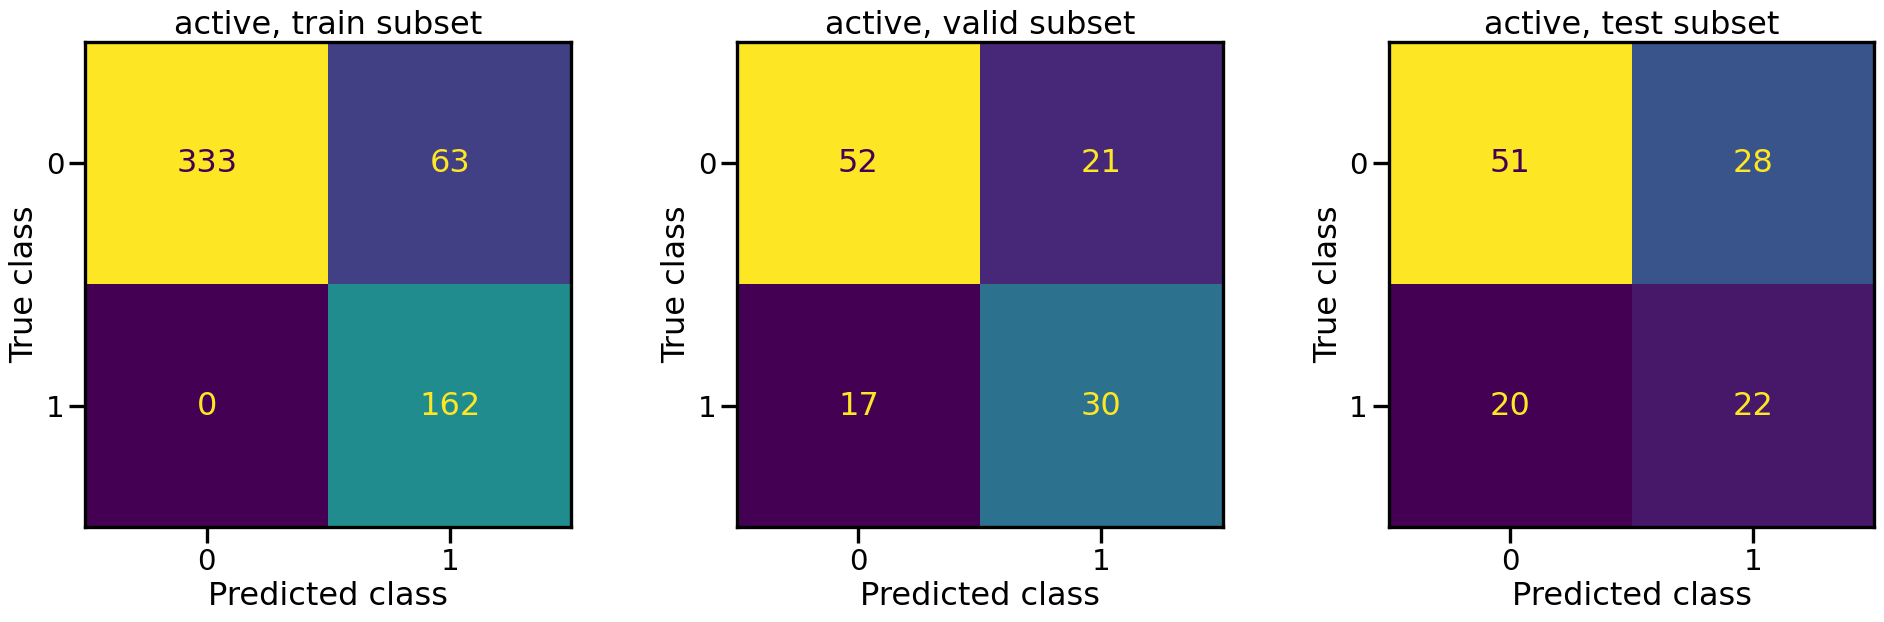

In [75]:
# plot best model, an NN
import importlib
importlib.reload(pp)
# model_path=result_df.iloc[0].model_path
# model_path_prc='/Users/echun/repos/DILI/AMPL_models/ST_models/ROS_models/ROS_hits_up_class_curMoe_model_38d4ce36-93f2-45fc-947b-b5c4b5ff92b4.tar.gz' 
# pp.plot_confusion_matrices(model_path_prc)
# model_path_roc='/Users/echun/repos/DILI/AMPL_models/ST_models/ROS_models/ROS_hits_up_class_curMoe_model_d3b8a785-4ed3-4858-b917-82a5d394351d.tar.gz' 
# pp.plot_confusion_matrices(model_path_roc)
# model_path_acc='/Users/echun/repos/DILI/AMPL_models/ST_models/ROS_models/ROS_hits_up_class_curMoe_model_5f392250-431c-47a3-b2b4-509134b6bd7e.tar.gz' 
# pp.plot_confusion_matrices(model_path_acc)
model_path_ec='/Users/echun/repos/DILI/AMPL_models/ST_models/ROS_models/ROS_hits_up_class_curR_model_b2a33aa3-59b5-4b75-8981-cf17afdb03da.tar.gz' 
pp.plot_confusion_matrices(model_path_ec)

This NN model looks like it isn't very good at predicting things with $pKi$ < 4.5. Additionally, there is a set of data at $pKi$=5 (this data is censored and all we know is that the compounds have a $pKi$ < 5 because higher concentrations of drug were not tested). This data is poorly predicted by the NN model.
> **Note:** *Be wary of selecting models only based on their performance metrics! As we can see, this NN has problems even though the r2_score is fairly high.*

In [ ]:
# plot best RF model
model_type='RF'
model_path=result_df[result_df.model_type==model_type].iloc[0].model_path
pp.plot_pred_vs_actual_from_file(model_path)
print('\nBest valid r2 score: ',result_df[result_df.model_type==model_type].iloc[0].best_valid_r2_score)
print('\nModel Parameters: ',result_df[result_df.model_type==model_type].iloc[0].model_parameters_dict,'\n')

This RF model looks like it did better at training than the best NN model, even though its performance validation score is slightly lower. The low $pKi$ values are learned more accurately in the training set, and the censored data at $pKi$=5 is also predicted more accurately.

2024-06-25 18:55:48,139 dataset/SLC6A3_models/SLC6A3_Ki_curated_model_94458d7b-7f94-44c9-83c3-a35833e76c37.tar.gz, 1.6.0
2024-06-25 18:55:48,140 Version compatible check: dataset/SLC6A3_models/SLC6A3_Ki_curated_model_94458d7b-7f94-44c9-83c3-a35833e76c37.tar.gz version = "1.6", AMPL version = "1.6"



Best valid r2 score:  0.5031490908520113

Model Parameters:  {"xgb_colsample_bytree": 1.0, "xgb_gamma": 0.0019288871251215423, "xgb_learning_rate": 0.2158168689218416, "xgb_max_depth": 6, "xgb_min_child_weight": 1.0, "xgb_n_estimators": 100, "xgb_subsample": 1.0} 



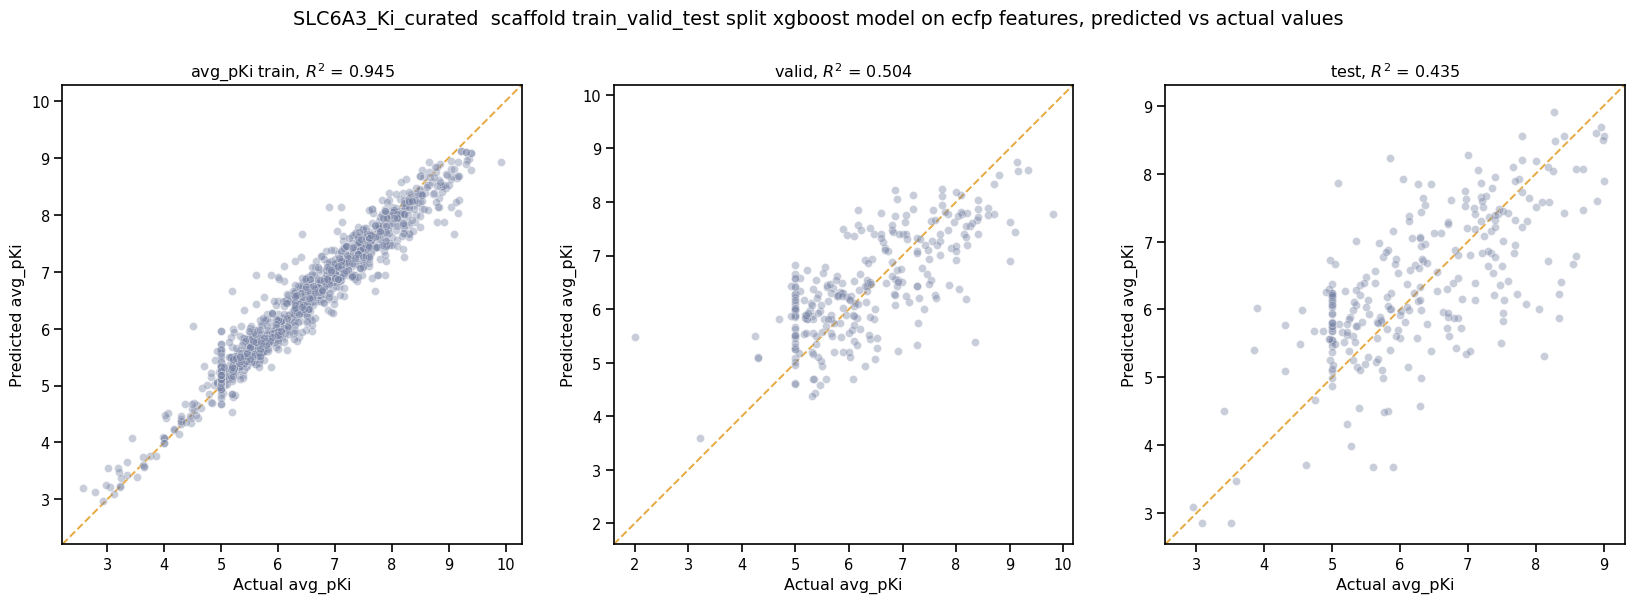

In [28]:
# plot best xgboost model
model_type='xgboost'
model_path=result_df[result_df.model_type==model_type].iloc[0].model_path
pp.plot_pred_vs_actual_from_file(model_path)
print('\nBest valid r2 score: ',result_df[result_df.model_type==model_type].iloc[0].best_valid_r2_score)
print('\nModel Parameters: ',result_df[result_df.model_type==model_type].iloc[0].model_parameters_dict,'\n')

This **[XGBoost](https://en.wikipedia.org/wiki/XGBoost)** model learns the low $pKi$ values better but still suffers from problems with predicting the censored data. 

Moving forward, we would select the **RF** model as the best performer.

In **Tutorial 7, "Train a Production Model"**, we will use the best-performing parameters to create a production model for the entire dataset.

If you have specific feedback about a tutorial, please complete the **[AMPL Tutorial Evaluation](https://forms.gle/pa9sHj4MHbS5zG7A6)**.